# Multiple Regression Analysis

In [ ]:
# 라이브러리

### Simple Regression Analysis : 단순선형회귀

- 독립변수(입력 데이터)의 선형 결합으로 종속변수를 설명
- 독립변수와 종속변수가 모두 연속형(숫자형)으로 구성되어야 함
- ŷ = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b
- y = ax1 + bx2 + cx3 + ... + z
    - x : 입력 데이터의 변수들(특성)
    - ŷ : 모델의 예측 결과
    - a~c : 회귀모델이 가지는 파라미터로 각 변수들의 가중치(계수)를 의미, 직선의 방정식에서 기울기
    - z : 회귀모델이 가지는 파라미터, 직선의 방정식에서 y절편
- 선형회귀(Linear regression) 또는 최소제곱법(OLS; Ordinary Least Squares)
    - 평균제곱오차(실제 값과 예측 값의 차이를 제곱한 것의 평균)를 최소화하는 파라미터 w, b를 구하는 알고리즘
    - 조정할 수 있는 매개변수가 없어 조작이 단순하지만 모델의 복잡도 및 성능을 제어할 수도 없음
    - 종류
        - 단순선형회귀 : 사용하는 데이터의 종류(특징, 설명변수)가 한 가지
        - 다중선형회귀 : 사용하는 데이터의 종류(설명변수)가 두 개 이상

### 잔차(Residual)

- 회귀분석에서 실제 결과(y)와 예측 결과(ŷ)의 차이 (e = y - ŷ)
- 모델에서 사용된 변수들을 통해 완전하게 설명하지 못한 부분으로 해석할 수 있음
- 선형회귀모델은 오차의 분산이 설명변수와 관계가 없다는 가정을 가지며 잔차의 변동성이 설명변수(x)에 따라 변하지 않음
- 잔차의 산포도가 일정한 방향 없이 균일하게 퍼져있는 모양일 때 해당 선형회귀모델의 회귀식의 적합도가 높음
- 잔차의 산포도(x: 설명변수, y: 잔차)
    - 비선형성 : 구간별로 잔차의 부호가 집중적으로 다르므로 선형회귀모델이 적합하지 않음
    - 이질성 : 잔차의 변동성이 x가 증가함에 따라 함께 증가하는 경향을 보임 
    <img src='img/residual.jpg' width='600' height='300' align='left'>
    

# StatsModel을 이용한 다중회귀분석

In [2]:
#sklearn 라이브러리에서 제공하는 make_regression을 사용하여 
# 다중회귀분석을 위한 독립변수들과 그에 의존하는 종속변수를 생성
from sklearn.datasets import make_regression
# 샘플 개수 : 100개
# 절편은 -5
# 독립변수 개수 : 2개
# 노이즈 10
# coef : 변수 계수 반환 여부
# 반환값 3개 : 입력변수, 종속변수, (계수)
X0, y, coef = make_regression(n_samples=100, n_features=2, bias=-5, noise=10, coef=True)

In [14]:
X0

array([[-0.41443159,  0.41863907],
       [-1.10784909,  0.18489935],
       [-0.48768882,  0.1999631 ],
       [ 0.10619141,  1.41345042],
       [ 0.4455838 ,  0.92603618],
       [ 0.18199353, -1.97094053],
       [ 0.65476336, -0.88883199],
       [-0.04368566, -0.02524936],
       [-0.80037333,  0.42924422],
       [-0.34322987,  1.03371357],
       [-0.35193154,  0.16244334],
       [-0.99442051, -0.7030706 ],
       [ 1.21941816,  1.0461027 ],
       [-0.49234153, -0.95255897],
       [ 0.34113638,  0.63243355],
       [ 0.6162219 , -0.32093929],
       [ 1.28368234, -0.11513138],
       [-1.37184149,  0.55121495],
       [ 1.17028375, -0.59538952],
       [ 1.25248233, -0.95583997],
       [ 2.78625721, -1.50180101],
       [ 0.52718962, -0.83558484],
       [ 0.23401089, -0.18011581],
       [-0.02722049, -0.98908101],
       [-2.09474409, -1.67664824],
       [ 0.79199174,  1.1486039 ],
       [ 1.13249345,  1.06660902],
       [-0.86375908, -0.97184382],
       [ 0.61921353,

In [5]:
#생성한 독립변수들과 종속변수를 확인
#statsmodels 의 회귀모형을 사용할 경우에는
#독립변수에 bias 처리를 위한 자리를 만들어줘야한다.
import statsmodels.api as sm

X = sm.add_constant(X0)

In [7]:
#StatsModels를 이용한 다중회귀분석을 위한 패키지 
#OLS
sm_model1 = sm.OLS(y, X)
sm_result1 = sm_model1.fit()

In [8]:
#결과출력
print(sm_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2711.
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           7.58e-86
Time:                        14:48:31   Log-Likelihood:                -378.11
No. Observations:                 100   AIC:                             762.2
Df Residuals:                      97   BIC:                             770.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7217      1.089     -5.256      0.0

In [9]:
# 생성된 회귀식의 잔차값
sm_result1.resid_pearson

array([-2.17691592e+00, -3.59136082e-01, -2.36379451e+00,  1.97452131e+00,
       -9.07988891e-02, -5.37270348e-01, -2.64762498e-01, -1.05336107e+00,
        1.35124584e+00,  8.96185817e-01,  2.74927613e-01, -2.19410053e-01,
       -1.09578623e+00, -1.48087487e+00,  6.01122071e-01, -8.24852867e-01,
       -5.96605324e-01,  3.54463344e-01, -1.58964011e-01,  1.77562711e-02,
       -8.20057336e-01,  1.24905139e+00,  1.25459686e+00, -4.15730884e-02,
        1.62303199e+00,  1.33818295e+00,  1.14771737e+00, -7.77257861e-01,
       -1.67926546e+00, -1.86203692e+00, -7.65685852e-01, -1.15462328e+00,
       -9.66809728e-01,  5.59210570e-01, -9.26207350e-01,  7.05762447e-01,
        8.54738969e-01, -8.95128647e-01, -5.83089085e-01,  1.24353491e+00,
        3.52687489e-02, -1.02299392e+00,  1.14183466e+00,  5.66056395e-01,
       -3.19511155e-01,  9.52871358e-03,  4.55834006e-01,  5.44652143e-01,
        6.20372281e-01,  7.42698487e-01,  1.42620318e+00,  4.22257515e-01,
       -1.69396900e+00, -

Text(0.5, 1.0, 'scatter plot between x2 and residual')

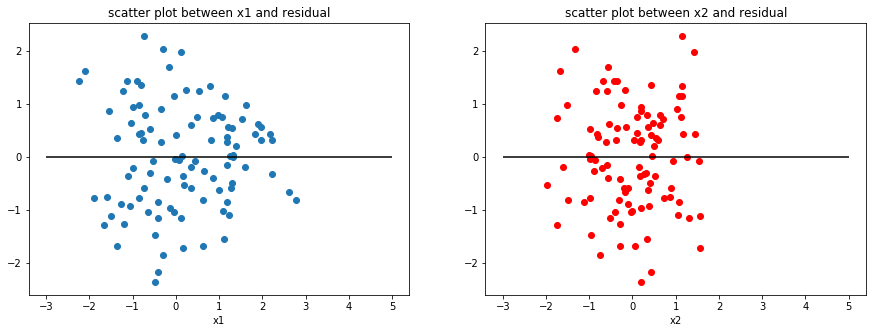

In [13]:
#잔차의 정규성 검정1 - 시각화1
# 잔차분석을 위한 산점도
# x1과 잔차에 대한 산점도를 첫번째 플롯에
# x2와 잔차에 대한 산점도를 두번째 플롯에
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(X0[:, 0], sm_result1.resid_pearson)
ax1.hlines(y=0, xmin=-3, xmax=5)
ax1.set_xlabel('x1')
ax1.set_title('scatter plot between x1 and residual')

ax2.scatter(X0[:, 1], sm_result1.resid_pearson, color='r')
ax2.hlines(y=0, xmin=-3, xmax=5)
ax2.set_xlabel('x2')
ax2.set_title('scatter plot between x2 and residual')

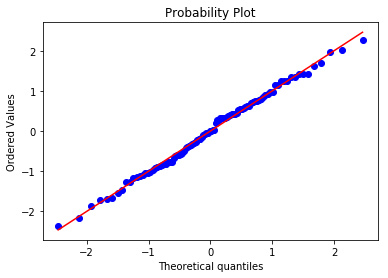

In [15]:
#잔차의 정규성 검정2 - 시각화2
#QQplot
import scipy as sp

sp.stats.probplot(sm_result1.resid_pearson, plot=plt)
plt.show()

In [16]:
#잔차의 정규성 검정3 - 통계값
#카이제곱 검정 => p-value 
#귀무가설 : 정규분포를 따른다.
#유의수준을 벗어나기 때문에 귀무가설을 기각할 수 없다. => 정규성 만족
import statsmodels.stats.api as sms

result = sms.omni_normtest(sm_result1.resid_pearson)
result

NormaltestResult(statistic=1.3222724336277378, pvalue=0.5162644128134614)

# Scikit-Learn을 이용한 다중회귀분석

In [18]:
#Scikit-Learn을 이용한 다중회귀분석
from sklearn.linear_model import LinearRegression

In [29]:
sk_model1 = LinearRegression()
sk_model1.fit(X0, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# 계수(coef_), 절편(intercept_)
sk_model1.coef_

array([67.35975097, 33.99167012])

In [31]:
sk_model1.intercept_

-5.7216806477181485

In [22]:
#적합된 회귀식이 자료를 얼마나 잘 설명하는지 나타내는 R squared 확인
sk_model1.score(X0,y)

0.9824233428664663

In [32]:
# 잔차구하기
# sklearn에서의 회귀모형은 계산된 잔차를 보여주는 옵션이 없음
# 잔차 = 정답 - 예측값
sk_resid = y - sk_model1.predict(X0)

Text(0.5, 1.0, 'scatter plot between x2 and sk_residual')

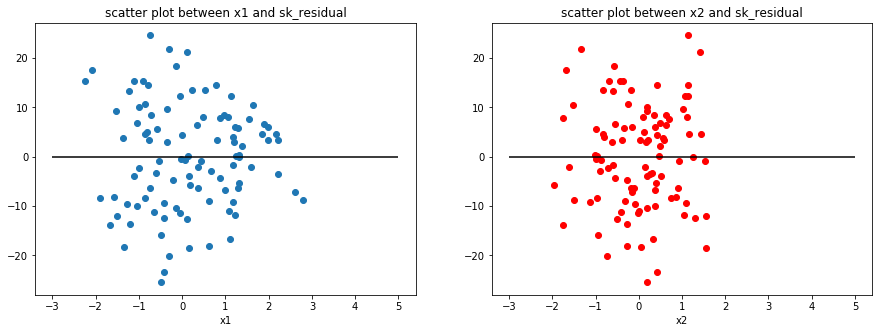

In [26]:
# 잔차분석을 위한 산점도
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(X0[:, 0], sk_resid)
ax1.hlines(y=0, xmin=-3, xmax=5)
ax1.set_xlabel('x1')
ax1.set_title('scatter plot between x1 and sk_residual')

ax2.scatter(X0[:, 1], sk_resid, color='r')
ax2.hlines(y=0, xmin=-3, xmax=5)
ax2.set_xlabel('x2')
ax2.set_title('scatter plot between x2 and sk_residual')

In [28]:
#잔차의 정규성 검정

sms.omni_normtest(sk_resid)

NormaltestResult(statistic=1.3222724336277278, pvalue=0.5162644128134641)

## 실습

In [ ]:
# (연습문제) 각각의 설정값에 따른 데이터 생성 
# 분포(산점도), coef 확인

In [36]:
# make_regression()
# n_samples=100
# n_features=1
# V1. bias = 30, noise = 0 
X1, y1, c1 = make_regression(n_samples=100, n_features=1,  bias=30, noise=0, coef=True)
# V2. bias = 0, noise = 30
X2, y2, c2 = make_regression(n_samples=100, n_features=1,  bias=0, noise=30, coef=True)
# V3. bias = 30, noise = 30
X3, y3, c3 = make_regression(n_samples=100, n_features=1,  bias=30, noise=30, coef=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B965493438>,
      dtype=object)

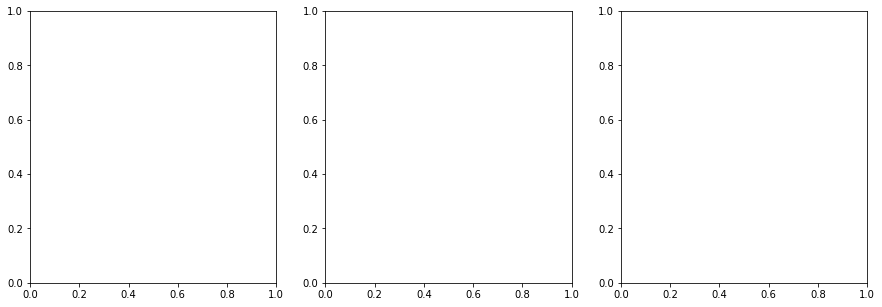

In [34]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes

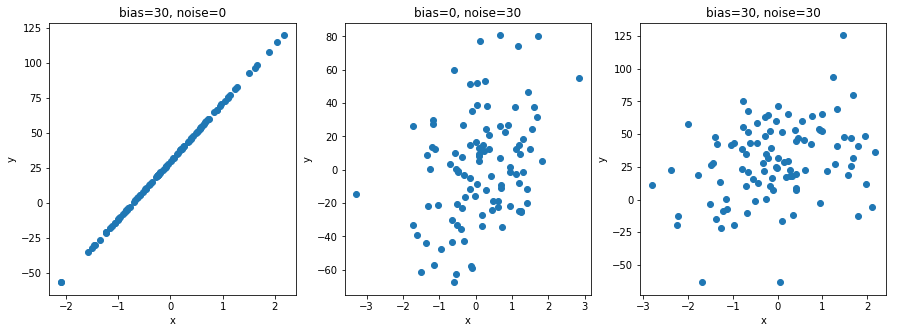

In [35]:
# 생성한 데이터 시각화
fig, axes = plt.subplots(1,3, figsize=(15,5))
data = [[X1, y1],[X2, y2],[X3, y3]]
titles = ['bias=30, noise=0','bias=0, noise=30','bias=30, noise=30']

for d,a,t in zip(data, axes, titles):
    a.scatter(d[0], d[1])
    a.set_xlabel('x')
    a.set_ylabel('y')
    a.set_title(t)

In [ ]:
# X1, y1 VS X2, y2

In [37]:
# 선형 회귀 모델 객체 생성 
reg1 = LinearRegression()
reg2 = LinearRegression()

In [38]:
# 모델 학습 
reg1.fit(X1, y1)
reg2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
# 선형 회귀 모델로 추정한 회귀식의 절편과 기울기 확인
# 절편 : intercept_
reg1.intercept_

30.0

In [40]:
reg2.intercept_

2.75690276611937

In [41]:
# 기울기 : coef_
# 회귀식이 추정한 기울기
reg1.coef_

array([31.46878143])

In [42]:
# 실제 기울기
c1

array(31.46878143)

In [43]:
reg2.coef_

array([37.93961521])

In [44]:
c2

array(38.97228697)

In [ ]:
# 추정 회귀식 
# reg1 => y = 31.46878143 * x + 30
# reg2 => y = 37.93961521 * x + 2.75690276611937

In [45]:
# 회귀식의 적합도
reg1.score(X1, y1)

1.0

In [46]:
reg2.score(X2, y2)

0.6464478401645755

In [ ]:
# (연습문제) 잔차분석을 위한 잔차 연산 및 산점도 시각화
# X1, y1

In [47]:
resid = y1 - reg1.predict(X1)

In [57]:
resid2 = y2 - reg2.predict(X2)

In [56]:
import numpy as np
np.sum(resid)

1.7763568394002505e-14

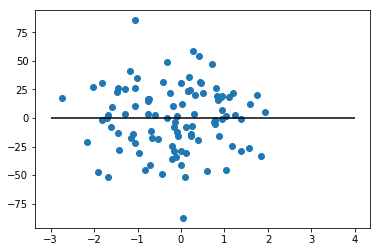

In [58]:
plt.scatter(X2, resid2)
plt.hlines(y=0, xmin=-3, xmax=4)

In [ ]:
# y = ~~~x+~~~

In [61]:
reg = LinearRegression()
reg.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

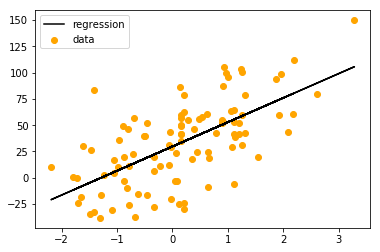

In [62]:
# (연습문제) 실제데이터와 추정한 회귀식을 그래프로 시각화
# X3, y3
plt.scatter(X3, y3, label='data', color='orange')
plt.plot(X3, reg.predict(X3), label='regression', color='k')
plt.legend()